In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import GridSearchCV, KFold
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score,mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from pandas.io.parsers.readers import DataFrame
from google.colab import files
AE_csv_import = files.upload()
import io
df = pd.read_csv(io.BytesIO(AE_csv_import['scaled_data_NoRandomPacking.csv']))
df.head()


Saving scaled_data_NoRandomPacking.csv to scaled_data_NoRandomPacking.csv


,Unnamed: 0.1,Unnamed: 0,Packing Type,Height,specific area,Corrugation angle,"S, Channel Side","B, Channel Base","h, Crimp height",packing element height,...,[OH-],CO2 in,CO2 out,Fractional Area,ReL,WeL E4,FrL,Who?,Glycerol,[alk]
0,0,0,M250Y,0.756098,0.426606,0.0,0.018784,0.001502,0.00147,0.019007,...,0.782934,0.454049,0.839744,0.226891,0.012465,0.000378,0.012551,Tsai,NaN,NaN
1,1,1,M250Y,0.756098,0.426606,0.0,0.018784,0.001502,0.00147,0.019007,...,0.730539,0.444950,0.788462,0.336134,0.030410,0.002033,0.030453,Tsai,NaN,NaN
2,2,2,M250Y,0.756098,0.426606,0.0,0.018784,0.001502,0.00147,0.019007,...,0.714072,0.444950,0.775641,0.369748,0.060190,0.006808,0.060288,Tsai,NaN,NaN
3,3,3,M250Y,0.756098,0.426606,0.0,0.018784,0.001502,0.00147,0.019007,...,0.711078,0.435851,0.766026,0.403361,0.088903,0.013333,0.088889,Tsai,NaN,NaN
4,4,4,M250Y,0.756098,0.426606,0.0,0.018784,0.001502,0.00147,0.019007,...,0.696108,0.435851,0.756410,0.428571,0.117422,0.021512,0.117490,Tsai,NaN,NaN


In [ ]:
X_base = df[['specific area','Corrugation angle','S, Channel Side','B, Channel Base','h, Crimp height','L','uG','T Corr','k OH E-3','DCO2 E9','HCO2 E-5','[OH-]']]
Y = df['Fractional Area'].values

X_simple = X_base[['specific area','Corrugation angle','S, Channel Side','B, Channel Base','h, Crimp height','L','uG','T Corr']].values
X_train, X_test, Y_train, Y_test = train_test_split(X_simple, Y, test_size=0.2)

X_2 = X_base[['specific area','Corrugation angle','S, Channel Side','B, Channel Base','h, Crimp height','L','uG','T Corr','DCO2 E9','HCO2 E-5']].values
X_b_tr,X_b_te,Y_b_tr,Y_b_te = train_test_split(X_2,Y,test_size = 0.2)


X_reduced = X_base[['L','uG','T Corr']].values
X_r1_tr,X_r1_te,Y_r1_tr,Y_r1_te = train_test_split(X_reduced,Y,test_size = 0.2)


**For the dataset X_simple**

In [ ]:
# create and fit the random forest regressor using X_train and Y_train
rf = RandomForestRegressor(max_depth=20, n_estimators=75, criterion='friedman_mse')
rf.fit(X_train, Y_train)

# predict Y_train and Y_test using the trained random forest regressor
Y_train_pred = rf.predict(X_train)
Y_test_pred = rf.predict(X_test)

# evaluate the performance of the random forest regressor using mean squared error
train_mse = mean_squared_error(Y_train, Y_train_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
train_r2 = r2_score(Y_train, Y_train_pred)
test_r2 = r2_score(Y_test, Y_test_pred)
train_MAPE = mean_absolute_percentage_error(Y_train, Y_train_pred)
test_MAPE = mean_absolute_percentage_error(Y_test, Y_test_pred)
print("MSE of X training data: ", train_mse)
print("MSE of X test data: ", test_mse)
print("r squre of X train data: ", train_r2)
print("r squre of X test data: ", test_r2)
print("MAPE of X training data: ", train_MAPE)
print("MAPE of X test data: ", test_MAPE)

MSE of X training data:  0.0002505536558383477
MSE of X test data:  0.0014322673569815575
r squre of X train data:  0.9904010134875916
r squre of X test data:  0.9526105012523151
MAPE of X training data:  184765214663.5636
MAPE of X test data:  0.10277551058122752


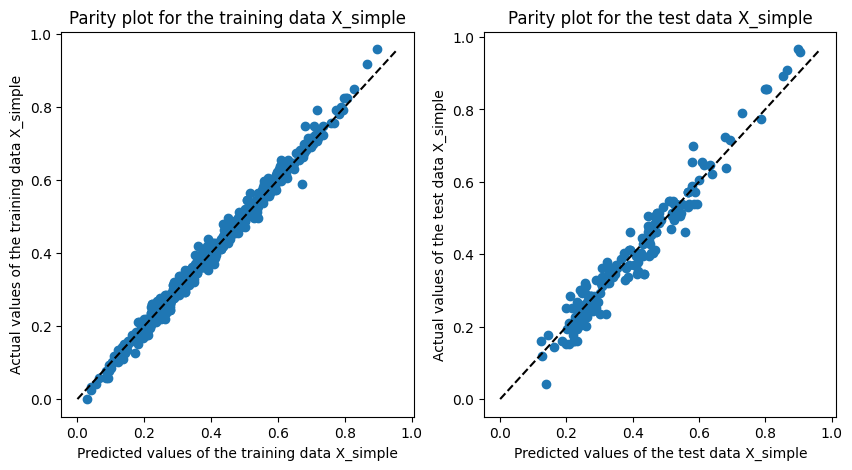

In [ ]:
# create figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# plot parity plot with line of best fit for training data
axs[0].scatter(Y_train_pred, Y_train)
axs[0].plot(np.linspace(0, np.max(Y_train), 100), np.linspace(0, np.max(Y_train), 100), 'k--')
axs[0].set_xlabel('Predicted values of the training data X_simple')
axs[0].set_ylabel('Actual values of the training data X_simple')
axs[0].set_title('Parity plot for the training data X_simple')

# plot parity plot with line of best fit for test data
axs[1].scatter(Y_test_pred, Y_test)
axs[1].plot(np.linspace(0, np.max(Y_test), 100), np.linspace(0, np.max(Y_test), 100), 'k--')
axs[1].set_xlabel('Predicted values of the test data X_simple')
axs[1].set_ylabel('Actual values of the test data X_simple')
axs[1].set_title('Parity plot for the test data X_simple')

# show the plots
plt.show()


In [ ]:
# Define number of repetitions
num_repetitions = 5
error_margin = 0.2

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4],
}

# Create a random forest regressor object
rf = RandomForestRegressor()

# Create a GridSearchCV object with 5-fold cross-validation
grid = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid.fit(X_train, Y_train)

# Print the best hyperparameters and corresponding mean test score
print("Best hyperparameters for X data:", grid.best_params_)
print("Best mean test score for X data:", -grid.best_score_)

# Make predictions on the test data
Y_pred = grid.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
mape = mean_absolute_percentage_error(Y_test, Y_pred)

# Print the evaluation metrics
print("MSE:", mse)
print("R-square:", r2)
print("MAPE:", mape)




Best hyperparameters for X data: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 150}
Best mean test score for X data: 0.0016013758700616876
MSE: 0.0012093864002938437
R-square: 0.9594747968456223
MAPE: 0.09960701220852924


In [ ]:
# Repeat the training and testing process with the best hyperparameters
mse_list = []
rsquared_list = []
mape_list = []

for i in range(num_repetitions):
    # Create and fit the random forest regressor using the best hyperparameters
    rf = RandomForestRegressor(**grid.best_params_)
    rf.fit(X_train, Y_train)

    # Predict Y_train and Y_test using the trained random forest regressor
    Y_train_pred = rf.predict(X_train)
    Y_test_pred = rf.predict(X_test)

    # Evaluate the performance of the random forest regressor
    train_mse = mean_squared_error(Y_train, Y_train_pred)
    test_mse = mean_squared_error(Y_test, Y_test_pred)
    train_rsquared = r2_score(Y_train, Y_train_pred)
    test_rsquared = r2_score(Y_test, Y_test_pred)
    train_mape = np.mean(np.abs((Y_train - Y_train_pred) / (Y_train + 1e-20))) * 100
    test_mape = np.mean(np.abs((Y_test - Y_test_pred) / Y_test+ 1e-20)) * 100

    # Append the performance metrics to the lists
    mse_list.append(test_mse)
    rsquared_list.append(test_rsquared)
    mape_list.append(test_mape)

    # Print the performance metrics for the current repetition
    print("Repetition", i+1)
    print("Train MSE:", train_mse)
    print("Test MSE:", test_mse)
    print("Train R-squared:", train_rsquared)
    print("Test R-squared:", test_rsquared)
    print("Train MAPE:", train_mape)
    print("Test MAPE:", test_mape)

# Calculate the mean and standard deviation of the performance metrics
mse_mean = np.mean(mse_list)
mse_std = np.std(mse_list)
rsquared_mean = np.mean(rsquared_list)
rsquared_std = np.std(rsquared_list)
mape_mean = np.mean(mape_list)
mape_std = np.std(mape_list)

from scipy.stats import t

# Calculate the t-score for a 95% confidence interval with (num_repetitions - 1) degrees of freedom
t_score = t.ppf(0.975, num_repetitions - 1)

# Calculate the confidence intervals for the performance metrics
mse_ci = t_score * mse_std / np.sqrt(num_repetitions)
rsquared_ci = t_score * rsquared_std / np.sqrt(num_repetitions)
mape_ci = t_score * mape_std / np.sqrt(num_repetitions)

# Add the confidence intervals to the print statements
print("MSE: {:.2f} ± {:.2f}".format(mse_mean, mse_ci))
print("R-square: {:.2f} ± {:.2f}".format(rsquared_mean, rsquared_ci))
print("MAPE: {:.2f}% ± {:.2f}%".format(mape_mean, mape_ci))



Repetition 1
Train MSE: 0.00019509244105636738
Test MSE: 0.0010424305852420534
Train R-squared: 0.9928376903971952
Test R-squared: 0.9594412778608629
Train MAPE: 3.8772790559408205e+17
Test MAPE: 8.786031545558691
Repetition 2
Train MSE: 0.00019622519436795507
Test MSE: 0.0010528639006615339
Train R-squared: 0.9927961043168875
Test R-squared: 0.9590353400966802
Train MAPE: 4.040451118816457e+17
Test MAPE: 8.741136716526752
Repetition 3
Train MSE: 0.00019697731631346797
Test MSE: 0.001032694447407074
Train R-squared: 0.9927684921233875
Test R-squared: 0.9598200899513251
Train MAPE: 3.760727579288024e+17
Test MAPE: 8.716255816466441
Repetition 4
Train MSE: 0.00019925312159446644
Test MSE: 0.0010156905345555783
Train R-squared: 0.9926849418744391
Test R-squared: 0.9604816754673158
Train MAPE: 4.724219769764216e+17
Test MAPE: 8.609184601966735
Repetition 5
Train MSE: 0.00019516659643122205
Test MSE: 0.0010550474034186315
Train R-squared: 0.9928349679762211
Test R-squared: 0.958950384721359

In [ ]:
# Create and fit the random forest regressor using the best hyperparameters
rf = RandomForestRegressor(**grid.best_params_)
rf.fit(X_train, Y_train)

# predict Y_train and Y_test using the trained random forest regressor
Y_train_pred = rf.predict(X_train)
Y_test_pred = rf.predict(X_test)

# evaluate the performance of the random forest regressor using mean squared error
train_mse = mean_squared_error(Y_train, Y_train_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
train_r2 = r2_score(Y_train, Y_train_pred)
test_r2 = r2_score(Y_test, Y_test_pred)
train_MAPE = mean_absolute_percentage_error(Y_train, Y_train_pred)
test_MAPE = mean_absolute_percentage_error(Y_test, Y_test_pred)
print("MSE of X training data: ", train_mse)
print("MSE of X test data: ", test_mse)
print("r squre of X train data: ", train_r2)
print("r squre of X test data: ", test_r2)
print("MAPE of X training data: ", train_MAPE)
print("MAPE of X test data: ", test_MAPE)

MSE of X training data:  0.00019287397847829015
MSE of X test data:  0.0010350991436119867
r squre of X train data:  0.992919135458523
r squre of X test data:  0.9597265284167875
MAPE of X training data:  169018179100.51224
MAPE of X test data:  0.08535536052532967


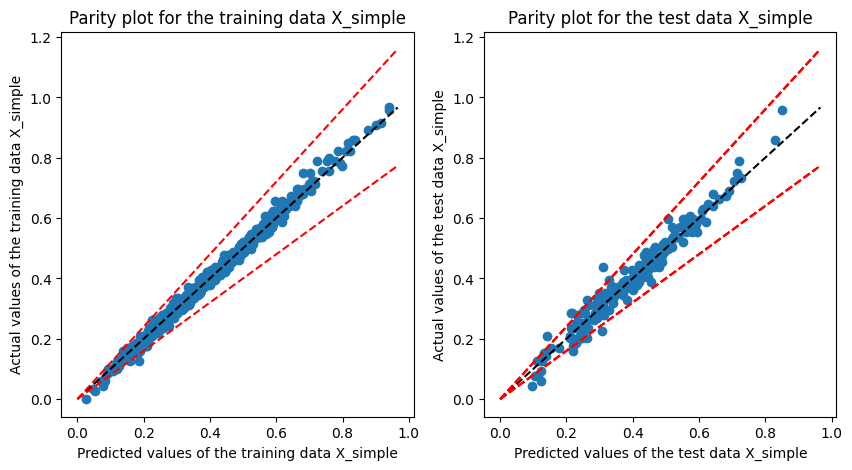

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot parity plot again using the the best hyperparameters for the training data X_simple
axs[0].scatter(Y_train_pred, Y_train)
axs[0].plot(np.linspace(0, np.max(Y_train), 100), np.linspace(0, np.max(Y_train), 100), 'k--')
axs[0].set_xlabel('Predicted values of the training data X_simple')
axs[0].set_ylabel('Actual values of the training data X_simple')
axs[0].set_title('Parity plot for the training data X_simple')
axs[0].plot(np.linspace(0, np.max(Y_train), 100), np.linspace(0, np.max(Y_train), 100)*(1+0.2), 'r--')
axs[0].plot(np.linspace(0, np.max(Y_train), 100), np.linspace(0, np.max(Y_train), 100)*(1-0.2), 'r--')

# Plot parity plot again using the the best hyperparameters for test data X_simple
axs[1].scatter(Y_test_pred, Y_test)
axs[1].plot(np.linspace(0, np.max(Y_train), 100), np.linspace(0, np.max(Y_train), 100), 'k--')
axs[1].set_xlabel('Predicted values of the test data X_simple')
axs[1].set_ylabel('Actual values of the test data X_simple')
axs[1].set_title('Parity plot for the test data X_simple')
axs[1].plot(np.linspace(0, np.max(Y_test), 100), np.linspace(0, np.max(Y_test), 100)*(1+0.2), 'r--')
axs[1].plot(np.linspace(0, np.max(Y_test), 100), np.linspace(0, np.max(Y_test), 100)*(1-0.2), 'r--')

# Add the error margin lines
plt.plot(np.linspace(0, np.max(Y_test), 100), np.linspace(0, np.max(Y_test), 100)*(1+error_margin), 'r--')
plt.plot(np.linspace(0, np.max(Y_test), 100), np.linspace(0, np.max(Y_test), 100)*(1-error_margin), 'r--')
plt.plot(np.linspace(0, np.max(Y_train), 100), np.linspace(0, np.max(Y_train), 100)*(1+error_margin), 'r--')
plt.plot(np.linspace(0, np.max(Y_train), 100), np.linspace(0, np.max(Y_train), 100)*(1-error_margin), 'r--')

plt.show()


In [ ]:
# Calculate the difference between predicted and true values
diff = Y_test_pred - Y_test

# Divide the test set into overprediction and underprediction subsets
over = diff[diff > 0]
under = diff[diff < 0]

# Calculate the mean of overprediction and underprediction
over_mean = np.mean(over)
under_mean = np.mean(under)

print("Average Overprediction of X_simple:", over_mean)
print("Average Underprediction of X_simple:", under_mean)

Average Overprediction of X_simple: 0.0278053915909953
Average Underprediction of X_simple: -0.025631336537313545


**For the dataset X_b**

In [ ]:
X_b_tr,X_b_te,Y_b_tr,Y_b_te = train_test_split(X_2,Y,test_size = 0.2)
rf_b = RandomForestRegressor(max_depth=20, n_estimators=75, criterion='friedman_mse')
rf_b.fit(X_b_tr, Y_b_tr)

Y_b_pred_tr = rf_b.predict(X_b_tr)
Y_b_pred_te = rf_b.predict(X_b_te)

mse_b_tr = mean_squared_error(Y_b_tr, Y_b_pred_tr)
mse_b_te = mean_squared_error(Y_b_te, Y_b_pred_te)
train_b_r2 = r2_score(Y_b_tr, Y_b_pred_tr)
test_b_r2 = r2_score(Y_b_te, Y_b_pred_te)
train_b_MAE = mean_absolute_error(Y_b_tr, Y_b_pred_tr)
test_b_MAE = mean_absolute_error(Y_b_te, Y_b_pred_te)

print("MSE of X_b training data: ", mse_b_tr)
print("MSE of X test data: ", mse_b_te)
print("r squre of X_b train data: ",train_b_r2)
print("r squre of X_b test data: ", test_b_r2)
print("MAE of X_b training data: ", train_b_MAE)
print("MAE of X_b test data: ", test_b_MAE)


MSE of X_b training data:  0.00021616792291975846
MSE of X test data:  0.0019875144235843773
r squre of X_b train data:  0.9918990372332168
r squre of X_b test data:  0.9287538871948529
MAE of X_b training data:  0.01106337681363539
MAE of X_b test data:  0.03135573197582567


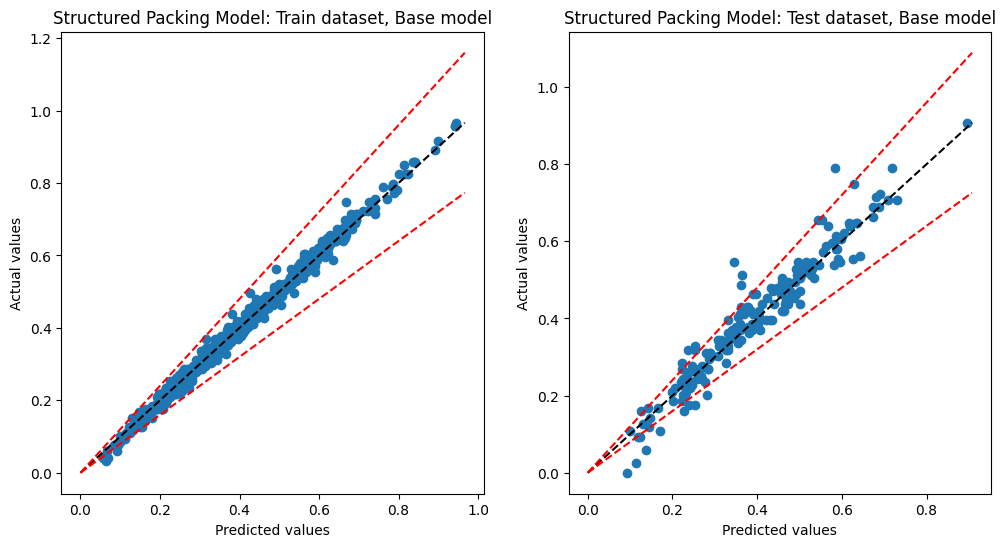

In [ ]:
# create figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# plot parity plot with line of best fit for training data
axs[0].scatter(Y_b_pred_tr, Y_b_tr)
axs[0].plot(np.linspace(0, np.max(Y_b_tr), 100), np.linspace(0, np.max(Y_b_tr), 100), 'k--')
axs[0].plot(np.linspace(0, np.max(Y_b_tr), 100), np.linspace(0, np.max(Y_b_tr), 100)*0.8, 'r--')
axs[0].plot(np.linspace(0, np.max(Y_b_tr), 100), np.linspace(0, np.max(Y_b_tr), 100)*1.2, 'r--')
axs[0].set_xlabel('Predicted values')
axs[0].set_ylabel('Actual values')
axs[0].set_title('Structured Packing Model: Train dataset, Base model')

# plot parity plot with line of best fit for test data
axs[1].scatter(Y_b_pred_te, Y_b_te)
axs[1].plot(np.linspace(0, np.max(Y_b_te), 100), np.linspace(0, np.max(Y_b_te), 100), 'k--')
axs[1].plot(np.linspace(0, np.max(Y_b_te), 100), np.linspace(0, np.max(Y_b_te), 100)*0.8, 'r--')
axs[1].plot(np.linspace(0, np.max(Y_b_te), 100), np.linspace(0, np.max(Y_b_te), 100)*1.2, 'r--')
axs[1].set_xlabel('Predicted values')
axs[1].set_ylabel('Actual values')
axs[1].set_title('Structured Packing Model: Test dataset, Base model')

# show the plots
plt.show()


In [ ]:
# Define number of repetitions
num_repetitions = 50
error_margin = 0.2

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4],
}

# Create a random forest regressor object
rf = RandomForestRegressor()

# Create a GridSearchCV object with 5-fold cross-validation
grid = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid.fit(X_b_tr, Y_b_tr)

# Print the best hyperparameters and corresponding mean test score
print("Best hyperparameters for X_b data:", grid.best_params_)
print("Best mean test score for X_b data:", -grid.best_score_)

# Make predictions on the test data
Y_b_pred = grid.predict(X_b_te)

# Calculate the evaluation metrics
mse_b = mean_squared_error(Y_b_te, Y_b_pred)
r2_b = r2_score(Y_b_te, Y_b_pred)
mae_b = mean_absolute_error(Y_b_te, Y_b_pred)

# Print the evaluation metrics
print("MSE using the best hyperparameters for X_b data:", mse_b)
print("R-square using the best hyperparameters for X_b data:", r2_b)
print("MAE using the best hyperparameters for X_b data:", mae_b)


Best hyperparameters for X_b data: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 100}
Best mean test score for X_b data: 0.001533871010869442
MSE using the best hyperparameters for X_b data: 0.0014908293380840134
R-square using the best hyperparameters for X_b data: 0.946558478301354
MAE using the best hyperparameters for X_b data: 0.027145178505635352


In [ ]:
# Repeat the training and testing process with the best hyperparameters
mse_b_list = []
rsquared_b_list = []
mae_b_list = []

for i in range(num_repetitions):
    X_b_tr,X_b_te,Y_b_tr,Y_b_te = train_test_split(X_2,Y,test_size = 0.2)
    # Create and fit the random forest regressor using the best hyperparameters
    rf_b = RandomForestRegressor(**grid.best_params_)
    rf_b.fit(X_b_tr, Y_b_tr)

    # Predict Y_train and Y_test using the trained random forest regressor
    Y_b_pred_tr = rf_b.predict(X_b_tr)
    Y_b_pred_te = rf_b.predict(X_b_te)

    # Evaluate the performance of the random forest regressor
    mse_b_tr = mean_squared_error(Y_b_tr, Y_b_pred_tr)
    mse_b_te = mean_squared_error(Y_b_te, Y_b_pred_te)
    train_b_r2 = r2_score(Y_b_tr, Y_b_pred_tr)
    test_b_r2 = r2_score(Y_b_te, Y_b_pred_te)
    train_b_MAE = mean_absolute_error(Y_b_tr, Y_b_pred_tr)
    test_b_MAE = mean_absolute_error(Y_b_te, Y_b_pred_te)

    # Append the performance metrics to the lists
    mse_b_list.append(mse_b_te)
    rsquared_b_list.append(test_b_r2)
    mae_b_list.append(test_b_MAE)

# Calculate the mean and standard deviation of the performance metrics
mse_mean_b = np.mean(mse_b_list)
mse_std_b = np.std(mse_b_list)
rsquared_mean_b = np.mean(rsquared_b_list)
rsquared_std_b = np.std(rsquared_b_list)
mae_mean_b = np.mean(mae_b_list)
mae_std_b = np.std(mae_b_list)

print("Test mse_mean_b:", mse_mean_b)
print("mse_std_b:", mse_std_b)
print("rsquared_mean_b:", rsquared_mean_b)
print("rsquared_std_b:", rsquared_std_b)
print("mae_mean_b:", mae_mean_b)
print("mae_std_b:", mae_std_b)

from scipy.stats import t

# Calculate the t-score for a 95% confidence interval with (num_repetitions - 1) degrees of freedom
t_score = t.ppf(0.975, num_repetitions - 1)

# Calculate the confidence intervals for the performance metrics
mse_ci_b = t_score * mse_std_b / np.sqrt(num_repetitions)
rsquared_ci_b = t_score * rsquared_std_b / np.sqrt(num_repetitions)
mae_ci_b = t_score * mae_std_b / np.sqrt(num_repetitions)

# Add the confidence intervals to the print statements
print("MSE_b: {:.2f} ± {:.2f}".format(mse_mean_b, mse_ci_b))
print("R-square_b: {:.2f} ± {:.2f}".format(rsquared_mean_b, rsquared_ci_b))
print("MAE_b: {:.2f}% ± {:.2f}%".format(mae_mean_b, mae_ci_b))

Test mse_mean_b: 0.0013403502485389424
mse_std_b: 0.00018335967160301237
rsquared_mean_b: 0.9498654282281648
rsquared_std_b: 0.0069930046925439845
mae_mean_b: 0.027598818426057443
mae_std_b: 0.0015470545215337133
MSE_b: 0.00 ± 0.00
R-square_b: 0.95 ± 0.00
MAE_b: 0.03% ± 0.00%


In [ ]:
# Create and fit the random forest regressor using the best hyperparameters for dataset X_b
rf_b = RandomForestRegressor(**grid.best_params_)
rf_b.fit(X_b_tr, Y_b_tr)

# predict Y_train and Y_test using the trained random forest regressor
Y_b_pred_tr = rf_b.predict(X_b_tr)
Y_b_pred_te = rf_b.predict(X_b_te)

# evaluate the performance of the random forest regressor using mean squared error
mse_b_tr = mean_squared_error(Y_b_tr, Y_b_pred_tr)
mse_b_te = mean_squared_error(Y_b_te, Y_b_pred_te)
train_b_r2 = r2_score(Y_b_tr, Y_b_pred_tr)
test_b_r2 = r2_score(Y_b_te, Y_b_pred_te)
train_b_MAE = mean_absolute_error(Y_b_tr, Y_b_pred_tr)
test_b_MAE = mean_absolute_error(Y_b_te, Y_b_pred_te)

print("MSE of X_b training data: ", mse_b_tr)
print("MSE of X test data: ", mse_b_te)
print("r squre of X_b train data: ",train_b_r2)
print("r squre of X_b test data: ", test_b_r2)
print("MAE of X_b training data: ", train_b_MAE)
print("MAE of X_b test data: ", test_b_MAE)


MSE of X_b training data:  0.00018121425515554596
MSE of X test data:  0.0013671484596049146
r squre of X_b train data:  0.9934121637117296
r squre of X_b test data:  0.9444209360499218
MAE of X_b training data:  0.010062044233712408
MAE of X_b test data:  0.02760542893068138


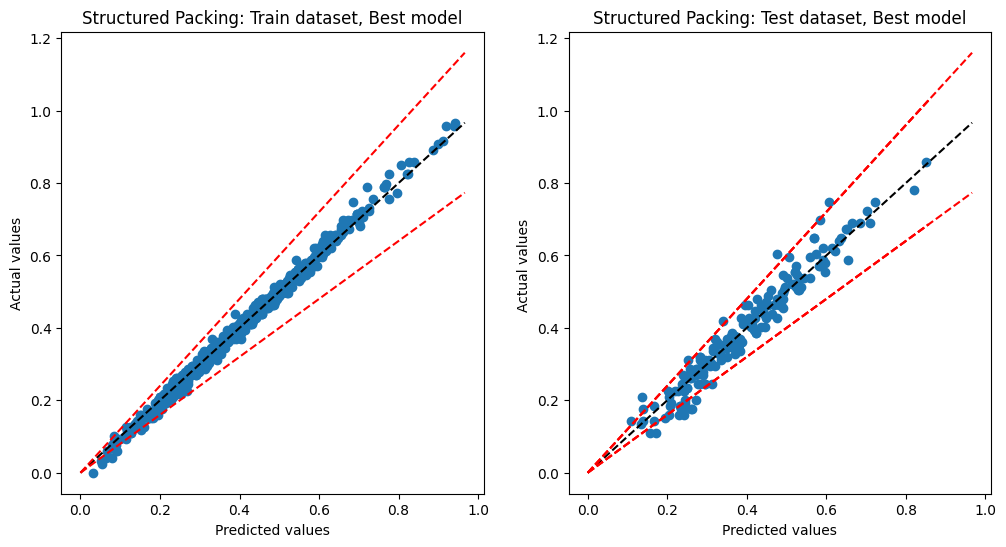

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot parity plot again using the the best hyperparameters for the training data X_b
axs[0].scatter(Y_b_pred_tr, Y_b_tr)
axs[0].plot(np.linspace(0, np.max(Y_b_tr), 100), np.linspace(0, np.max(Y_b_tr), 100), 'k--')
axs[0].set_xlabel('Predicted values')
axs[0].set_ylabel('Actual values')
axs[0].set_title('Structured Packing: Train dataset, Best model')
axs[0].plot(np.linspace(0, np.max(Y_b_tr), 100), np.linspace(0, np.max(Y_b_tr), 100)*(1+0.2), 'r--')
axs[0].plot(np.linspace(0, np.max(Y_b_tr), 100), np.linspace(0, np.max(Y_b_tr), 100)*(1-0.2), 'r--')

# Plot parity plot again using the the best hyperparameters for test data X_b
axs[1].scatter(Y_b_pred_te, Y_b_te)
axs[1].plot(np.linspace(0, np.max(Y_b_tr), 100), np.linspace(0, np.max(Y_b_tr), 100), 'k--')
axs[1].set_xlabel('Predicted values')
axs[1].set_ylabel('Actual values ')
axs[1].set_title('Structured Packing: Test dataset, Best model')
axs[1].plot(np.linspace(0, np.max(Y_b_te), 100), np.linspace(0, np.max(Y_b_te), 100)*(1+0.2), 'r--')
axs[1].plot(np.linspace(0, np.max(Y_b_te), 100), np.linspace(0, np.max(Y_b_te), 100)*(1-0.2), 'r--')

# Add the error margin lines
plt.plot(np.linspace(0, np.max(Y_b_te), 100), np.linspace(0, np.max(Y_b_te), 100)*(1+error_margin), 'r--')
plt.plot(np.linspace(0, np.max(Y_b_te), 100), np.linspace(0, np.max(Y_b_te), 100)*(1-error_margin), 'r--')
plt.plot(np.linspace(0, np.max(Y_b_tr), 100), np.linspace(0, np.max(Y_b_tr), 100)*(1+error_margin), 'r--')
plt.plot(np.linspace(0, np.max(Y_b_tr), 100), np.linspace(0, np.max(Y_b_tr), 100)*(1-error_margin), 'r--')

plt.show()


In [ ]:
# Calculate the difference between predicted and true values
diff = Y_b_pred_te - Y_b_te

# Divide the test set into overprediction and underprediction subsets
over_b = diff[diff > 0]
under_b = diff[diff < 0]

# Calculate the mean of overprediction and underprediction
over_mean_b = np.mean(over_b)
under_mean_b = np.mean(under_b)

print("Average Overprediction of X_b:", over_mean_b)
print("Average Underprediction of X_b:", under_mean_b)

Average Overprediction of X_b: 0.027783338063295835
Average Underprediction of X_b: -0.0274333211828261


**For the dataset X_reduced**

In [ ]:
# create and fit the random forest regressor 
X_r1_tr,X_r1_te,Y_r1_tr,Y_r1_te = train_test_split(X_reduced,Y,test_size = 0.2)
rf_r1 = RandomForestRegressor(max_depth=20, n_estimators=75, criterion='friedman_mse')
rf_r1.fit(X_r1_tr, Y_r1_tr)

# predict Y_train and Y_test using the trained random forest regressor
Y_r1_pred_tr = rf_r1.predict(X_r1_tr)
Y_r1_pred_te = rf_r1.predict(X_r1_te)

# evaluate the performance of the random forest regressor using mean squared error
mse_r1_tr = mean_squared_error(Y_r1_tr, Y_r1_pred_tr)
mse_r1_te = mean_squared_error(Y_r1_te, Y_r1_pred_te)
train_r1_r2 = r2_score(Y_r1_tr, Y_r1_pred_tr)
test_r1_r2 = r2_score(Y_r1_te, Y_r1_pred_te)
train_r1_MAE = mean_absolute_error(Y_r1_tr, Y_r1_pred_tr)
test_r1_MAE = mean_absolute_error(Y_r1_te, Y_r1_pred_te)

print("MSE of X_r1 training data: ", mse_r1_tr)
print("MSE of X_r1 test data: ", mse_r1_te)
print("r squre of X_r1 train data: ", train_r1_r2)
print("r squre of X_r1 test data: ", test_r1_r2)
print("MAE of X_r1 training data: ", train_r1_MAE)
print("MAE of X_r1 test data: ", test_r1_MAE)


MSE of X_r1 training data:  0.0020886220048847316
MSE of X_r1 test data:  0.012641525512312662
r squre of X_r1 train data:  0.9205533043377813
r squre of X_r1 test data:  0.5703760876154482
MAE of X_r1 training data:  0.031896102781388644
MAE of X_r1 test data:  0.08656647924296361


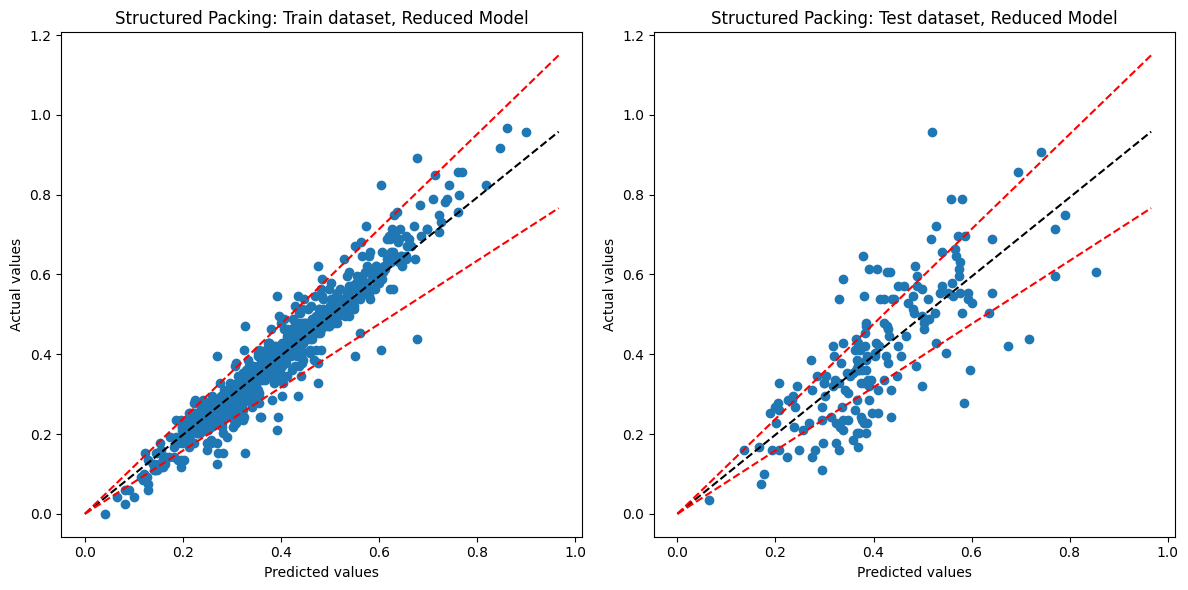

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# plot for training data
ax1.scatter(Y_r1_pred_tr, Y_r1_tr)
ax1.plot(np.linspace(0, np.max(Y_r1_tr), 100), np.linspace(0, np.max(Y_train), 100), 'k--')
ax1.plot(np.linspace(0, np.max(Y_r1_tr), 100), 1.2*np.linspace(0, np.max(Y_train), 100), 'r--')
ax1.plot(np.linspace(0, np.max(Y_r1_tr), 100), 0.8*np.linspace(0, np.max(Y_train), 100), 'r--')
ax1.set_xlabel('Predicted values')
ax1.set_ylabel('Actual values')
ax1.set_title('Structured Packing: Train dataset, Reduced Model')

# plot for test data
ax2.scatter(Y_r1_pred_te, Y_r1_te)
ax2.plot(np.linspace(0, np.max(Y_r1_tr), 100), np.linspace(0, np.max(Y_train), 100), 'k--')
ax2.plot(np.linspace(0, np.max(Y_r1_tr), 100), 1.2*np.linspace(0, np.max(Y_train), 100), 'r--')
ax2.plot(np.linspace(0, np.max(Y_r1_tr), 100), 0.8*np.linspace(0, np.max(Y_train), 100), 'r--')
ax2.set_xlabel('Predicted values')
ax2.set_ylabel('Actual values')
ax2.set_title('Structured Packing: Test dataset, Reduced Model')

plt.tight_layout()
plt.show()


In [ ]:
# Define number of repetitions
num_repetitions = 50
error_margin = 0.2

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [75, 100, 150],
    'max_depth': [10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4],
}

# Create a random forest regressor object
rf_r1 = RandomForestRegressor()

# Create a GridSearchCV object with 5-fold cross-validation
grid = GridSearchCV(rf_r1, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid.fit(X_r1_tr, Y_r1_tr)

# Print the best hyperparameters and corresponding mean test score
print("Best hyperparameters for X reduced data:", grid.best_params_)
print("Best mean test score for X reduced data:", -grid.best_score_)

# Make predictions on the test data
Y_r1_pred = grid.predict(X_r1_te)

# Calculate the evaluation metrics
mse_r1 = mean_squared_error(Y_r1_te, Y_r1_pred)
r2_r1 = r2_score(Y_r1_te, Y_r1_pred)
mae_r1 = mean_absolute_error(Y_r1_te, Y_r1_pred)

# Print the evaluation metrics
print("MSE using the best hyperparameters for X_reduced data:", mse_r1)
print("R-square  using the best hyperparameters for X_reduced data:", r2_r1)
print("MAE using the best hyperparameters for X_reduced data:", mae_r1)



Best hyperparameters for X reduced data: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 150}
Best mean test score for X reduced data: 0.010446897478291481
MSE using the best hyperparameters for X_reduced data: 0.011750424457590615
R-square  using the best hyperparameters for X_reduced data: 0.6006602745268148
MAE using the best hyperparameters for X_reduced data: 0.08427750968893502


In [ ]:
# Repeat the training and testing process with the best hyperparameters
mse_r1_list = []
rsquared_r1_list = []
mae_r1_list = []

for i in range(num_repetitions):
    X_r1_tr,X_r1_te,Y_r1_tr,Y_r1_te = train_test_split(X_reduced,Y,test_size = 0.2)
    # Create and fit the random forest regressor using the best hyperparameters
    rf_r1 = RandomForestRegressor(**grid.best_params_)
    rf_r1.fit(X_r1_tr, Y_r1_tr)

    # Predict Y_train and Y_test using the trained random forest regressor
    Y_r1_pred_tr = rf_r1.predict(X_r1_tr)
    Y_r1_pred_te = rf_r1.predict(X_r1_te)

    # Evaluate the performance of the random forest regressor
    mse_r1_tr = mean_squared_error(Y_r1_tr, Y_r1_pred_tr)
    mse_r1_te = mean_squared_error(Y_r1_te, Y_r1_pred_te)
    train_r1_r2 = r2_score(Y_r1_tr, Y_r1_pred_tr)
    test_r1_r2 = r2_score(Y_r1_te, Y_r1_pred_te)
    train_r1_MAE = mean_absolute_error(Y_r1_tr, Y_r1_pred_tr)
    test_r1_MAE = mean_absolute_error(Y_r1_te, Y_r1_pred_te)

    # Append the performance metrics to the lists
    mse_r1_list.append(mse_r1_te)
    rsquared_r1_list.append(test_r1_r2)
    mae_r1_list.append(test_r1_MAE)

# Calculate the mean and standard deviation of the performance metrics
mse_mean_r1 = np.mean(mse_r1_list)
mse_std_r1 = np.std(mse_r1_list)
rsquared_mean_r1 = np.mean(rsquared_r1_list)
rsquared_std_r1 = np.std(rsquared_r1_list)
mae_mean_r1 = np.mean(mae_r1_list)
mae_std_r1 = np.std(mae_r1_list)

print("mse_mean_r1:", mse_mean_r1)
print("mse_std_r1:", mse_std_r1)
print("rsquared_mean_r1:", rsquared_mean_r1)
print("rsquared_std_r1:", rsquared_std_r1)
print("mae_mean_r1:", mae_mean_r1)
print("mae_std_r1:", mae_std_r1)

# Calculate the t-score for a 95% confidence interval with (num_repetitions - 1) degrees of freedom
t_score = t.ppf(0.975, num_repetitions - 1)

# Calculate the confidence intervals for the performance metrics
mse_ci_r1 = t_score * mse_std_r1 / np.sqrt(num_repetitions)
rsquared_ci_r1 = t_score * rsquared_std_r1 / np.sqrt(num_repetitions)
mape_ci_r1 = t_score * mae_std_r1 / np.sqrt(num_repetitions)

# Add the confidence intervals to the print statements
print("MSE_r1: {:.2f} ± {:.2f}".format(mse_mean_r1, mse_ci_r1))
print("R-square_r1: {:.2f} ± {:.2f}".format(rsquared_mean_r1, rsquared_ci_r1))
print("MAE_r1: {:.2f}% ± {:.2f}%".format(mae_mean_r1, mape_ci_r1))


mse_mean_r1: 0.010839858744755841
mse_std_r1: 0.0010183368721433785
rsquared_mean_r1: 0.5955006934846261
rsquared_std_r1: 0.03839140189897857
mae_mean_r1: 0.07956207171893169
mae_std_r1: 0.003742929397708081
MSE_r1: 0.01 ± 0.00
R-square_r1: 0.60 ± 0.01
MAE_r1: 0.08% ± 0.00%


In [ ]:
# Create and fit the random forest regressor using the best hyperparameters for dataset X_r1
rf_r1 = RandomForestRegressor(**grid.best_params_)
rf_r1.fit(X_r1_tr, Y_r1_tr)

# predict Y_train and Y_test using the trained random forest regressor
Y_r1_pred_tr = rf_r1.predict(X_r1_tr)
Y_r1_pred_te = rf_r1.predict(X_r1_te)

# evaluate the performance of the random forest regressor using mean squared error
mse_r1_tr = mean_squared_error(Y_r1_tr, Y_r1_pred_tr)
mse_r1_te = mean_squared_error(Y_r1_te, Y_r1_pred_te)
train_r1_r2 = r2_score(Y_r1_tr, Y_r1_pred_tr)
test_r1_r2 = r2_score(Y_r1_te, Y_r1_pred_te)
train_r1_MAE = mean_absolute_error(Y_r1_tr, Y_r1_pred_tr)
test_r1_MAE = mean_absolute_error(Y_r1_te, Y_r1_pred_te)

print("MSE of X_r1 training data: ", mse_r1_tr)
print("MSE of X_r1 test data: ", mse_r1_te)
print("r squre of X_r1 train data: ",train_r1_r2)
print("r squre of X_r1 test data: ", test_r1_r2)
print("MAE of X_r1 training data: ", train_r1_MAE)
print("MAE of X_r1 test data: ", test_r1_MAE)

MSE of X_r1 training data:  0.005483871655311082
MSE of X_r1 test data:  0.011027426664207446
r squre of X_r1 train data:  0.7946948959752809
r squre of X_r1 test data:  0.6015992183805243
MAE of X_r1 training data:  0.056811356435439865
MAE of X_r1 test data:  0.07707718263479328


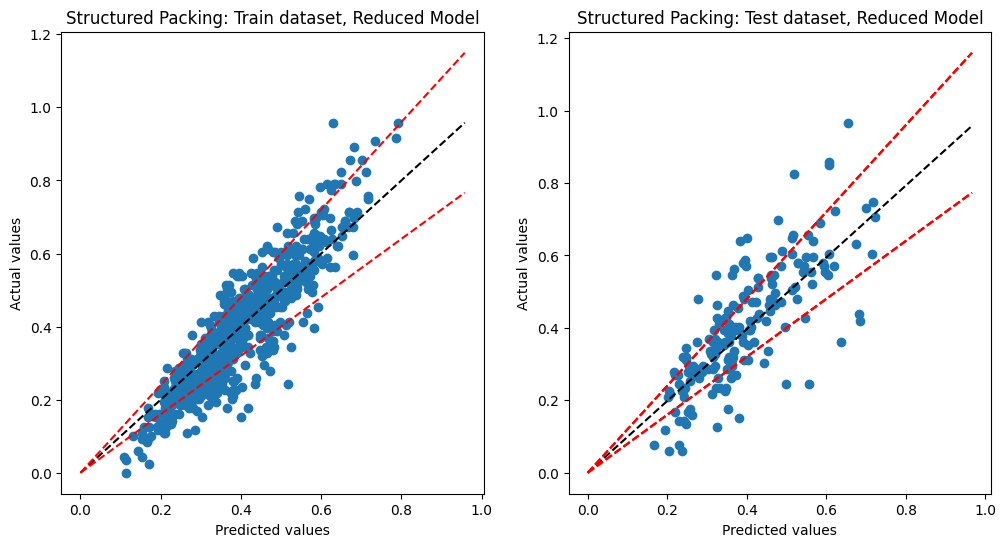

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot parity plot again using the the best hyperparameters for the training data X_r1
axs[0].scatter(Y_r1_pred_tr, Y_r1_tr)
axs[0].plot(np.linspace(0, np.max(Y_r1_tr), 100), np.linspace(0, np.max(Y_r1_tr), 100), 'k--')
axs[0].set_xlabel('Predicted values')
axs[0].set_ylabel('Actual values')
axs[0].set_title('Structured Packing: Train dataset, Reduced Model')
axs[0].plot(np.linspace(0, np.max(Y_r1_tr), 100), np.linspace(0, np.max(Y_r1_tr), 100)*(1+0.2), 'r--')
axs[0].plot(np.linspace(0, np.max(Y_r1_tr), 100), np.linspace(0, np.max(Y_r1_tr), 100)*(1-0.2), 'r--')

# Plot parity plot again using the the best hyperparameters for test data X_r1
axs[1].scatter(Y_r1_pred_te, Y_r1_te)
axs[1].plot(np.linspace(0, np.max(Y_b_tr), 100), np.linspace(0, np.max(Y_r1_tr), 100), 'k--')
axs[1].set_xlabel('Predicted values')
axs[1].set_ylabel('Actual values')
axs[1].set_title('Structured Packing: Test dataset, Reduced Model')
axs[1].plot(np.linspace(0, np.max(Y_r1_te), 100), np.linspace(0, np.max(Y_r1_te), 100)*(1+0.2), 'r--')
axs[1].plot(np.linspace(0, np.max(Y_r1_te), 100), np.linspace(0, np.max(Y_r1_te), 100)*(1-0.2), 'r--')

# Add the error margin lines
plt.plot(np.linspace(0, np.max(Y_r1_te), 100), np.linspace(0, np.max(Y_r1_te), 100)*(1+error_margin), 'r--')
plt.plot(np.linspace(0, np.max(Y_r1_te), 100), np.linspace(0, np.max(Y_r1_te), 100)*(1-error_margin), 'r--')
plt.plot(np.linspace(0, np.max(Y_r1_tr), 100), np.linspace(0, np.max(Y_r1_tr), 100)*(1+error_margin), 'r--')
plt.plot(np.linspace(0, np.max(Y_r1_tr), 100), np.linspace(0, np.max(Y_r1_tr), 100)*(1-error_margin), 'r--')

plt.show()


In [ ]:
# Calculate the difference between predicted and true values
diff = Y_r1_pred_te - Y_r1_te

# Divide the test set into overprediction and underprediction subsets
over_r1 = diff[diff > 0]
under_r1 = diff[diff < 0]

# Calculate the mean of overprediction and underprediction
over_mean_r1 = np.mean(over_r1)
under_mean_r1 = np.mean(under_r1)

print("Average Overprediction of X_b:", over_mean_b)
print("Average Underprediction of X_b:", under_mean_b)

Average Overprediction of X_b: 0.026864686485412525
Average Underprediction of X_b: -0.03185154059541674
